# Problem Statement

## Business Context:

The project aims to develop a machine learning system that predicts individual income levels based on demographic and employment data.

The prediction boundary is set at $50,000 annually (binary classification problem).

The solution will help in understanding socio-economic factors affecting income levels.

Enable data-driven decision making for policy makers and financial institutions.

Identify key socio-economic factors influencing income disparities.

Support targeted intervention programs for economic development

## Key Stakeholders

**Policy Makers:** For evidence-based policy development

**Financial Institutions:** For risk assessment and product development

**Social Services:** For resource allocation and program planning

**Research Organizations:** For socio-economic studies

# Import Required Libraries
Import the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
# Import Required Libraries
# Import the necessary libraries for data manipulation, visualization, and modeling.

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report, ConfusionMatrixDisplay

# Ignore warnings
warnings.filterwarnings("ignore")

# Set seaborn style for plots
sns.set(rc={"figure.figsize": (15, 6)})

# Display all columns in the dataframe
pd.set_option("display.max_columns", None)

Matplotlib is building the font cache; this may take a moment.


# About the Dataset
Describing the dataset, including the features and their types.
#### About the Dataset
- **Age:** Describes the age of individuals. Continuous.
- **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** Continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** Number of years spent in education. Continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** Continuous.
- **capital-loss:** Continuous.
- **hours-per-week:** Continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income:** >50K,<=50K

# Initial Data Exploration
Perform initial data exploration, including displaying the first few rows, checking the shape, columns, data types, and summary statistics.

In [2]:
data = pd.read_csv("data-source/adult.csv")

In [3]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Display the shape of the dataset
print("Shape of the dataset:")
print(data.shape)

# Display the column names
print("Column names in the dataset:")
print(data.columns)

# Display the data types of each column
print("Data types of each column:")
print(data.dtypes)

# Display information about the dataset
print("Information about the dataset:")
print(data.info())

# Check for null values in the dataset
print("Null values in the dataset:")
print(data.isnull().sum())

# Check for duplicate values in the dataset
print("Duplicate values in the dataset:")
print(data.duplicated().sum())

# Drop duplicate values from the dataset
data.drop_duplicates(inplace=True)

# Display summary statistics of the dataset
print("Summary statistics of the dataset:")
print(data.describe())

# Separate categorical and numerical features
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

# Display categorical features
print("Categorical features:")
print(categorical_features)

# Display numerical features
print("Numerical features:")
print(numerical_features)

# Display unique values for each categorical feature
print("Unique values for each categorical feature:")
for feature in categorical_features:
    print(f"{feature}: {data[feature].unique()}")

First few rows of the dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Shape of the dataset:
(32561, 15)
Column names in the dataset:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
Data types of each column:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int6

# Data Cleaning
Clean the data by handling missing values, removing duplicates, and correcting data types.

In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
# Data Cleaning
# Clean the data by handling missing values, removing duplicates, and correcting data types.

# Replace missing values in categorical features with the mode
data["workclass"] = data["workclass"].replace(" ?", data["workclass"].mode()[0])
data["occupation"] = data["occupation"].replace(" ?", data["occupation"].mode()[0])
data["native_country"] = data["native.country"].replace(" ?", data["native.country"].mode()[0])

# Check for null values again to ensure they are handled
print("Null values in the dataset after cleaning:")
print(data.isnull().sum())

# Correct data types if necessary (example: converting 'income' to binary)
data["income"] = data["income"].map({">50K": 1, "<=50K": 0})

# Verify the changes
print("Data types after corrections:")
print(data.dtypes)

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
display(data.head())

Null values in the dataset after cleaning:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
native_country    0
dtype: int64
Data types after corrections:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
native_country    object
dtype: object
First few rows of the cleaned dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,United-States


# Data Visualization
Visualize the data using various plots to understand the distribution of features and relationships between them.

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'native_country'],
      dtype='object')

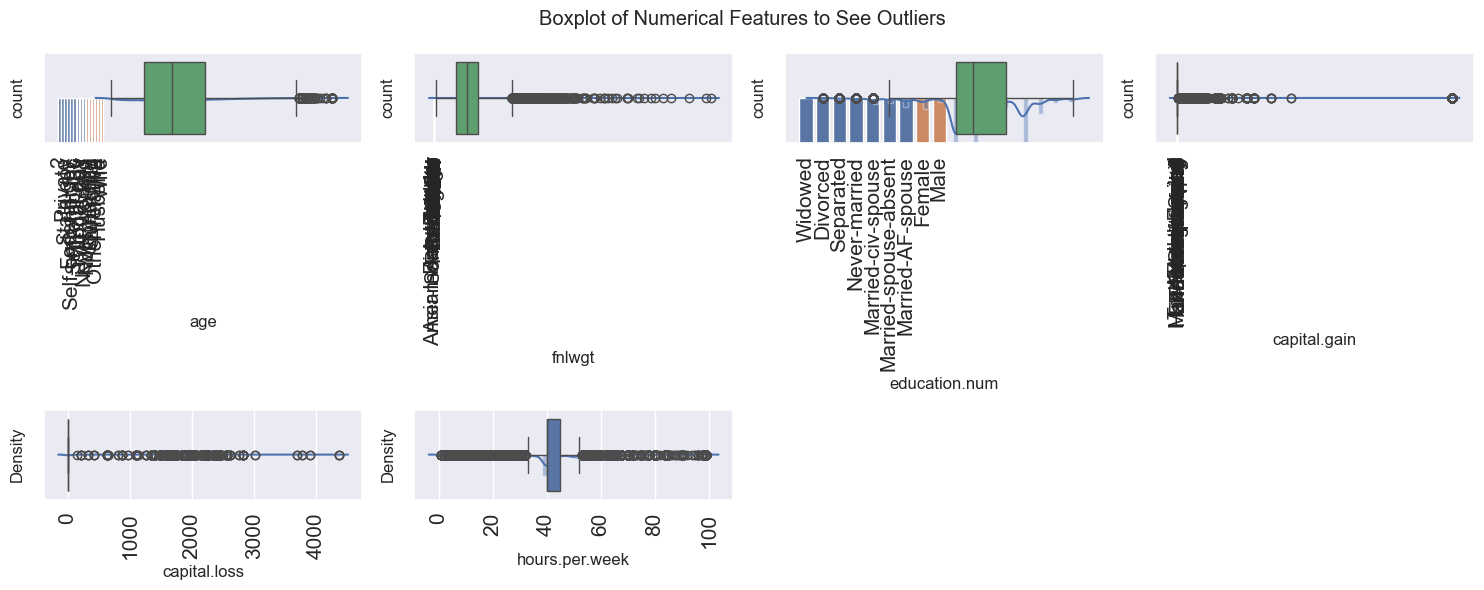

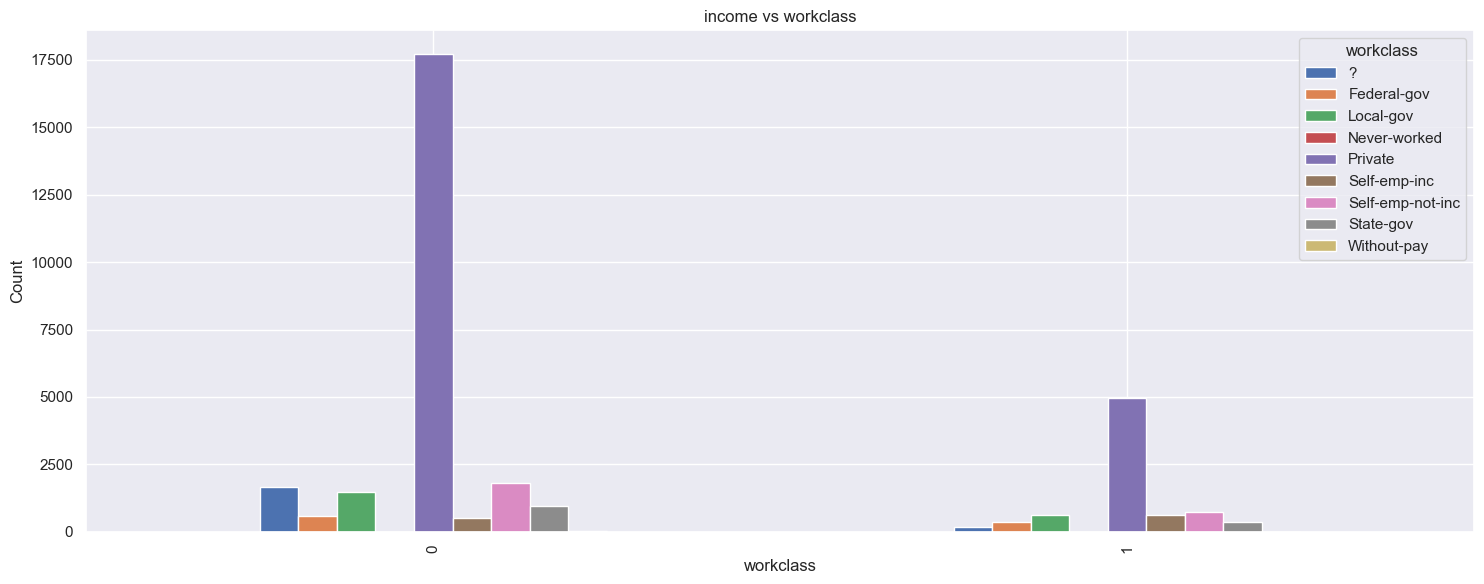

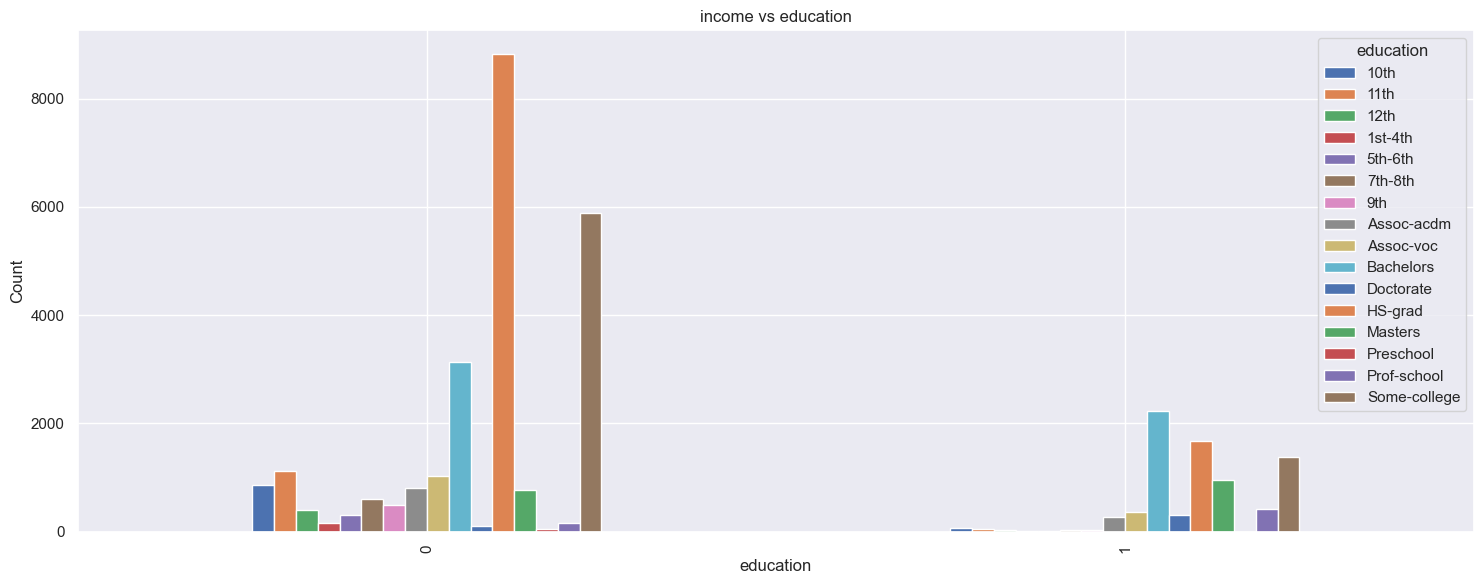

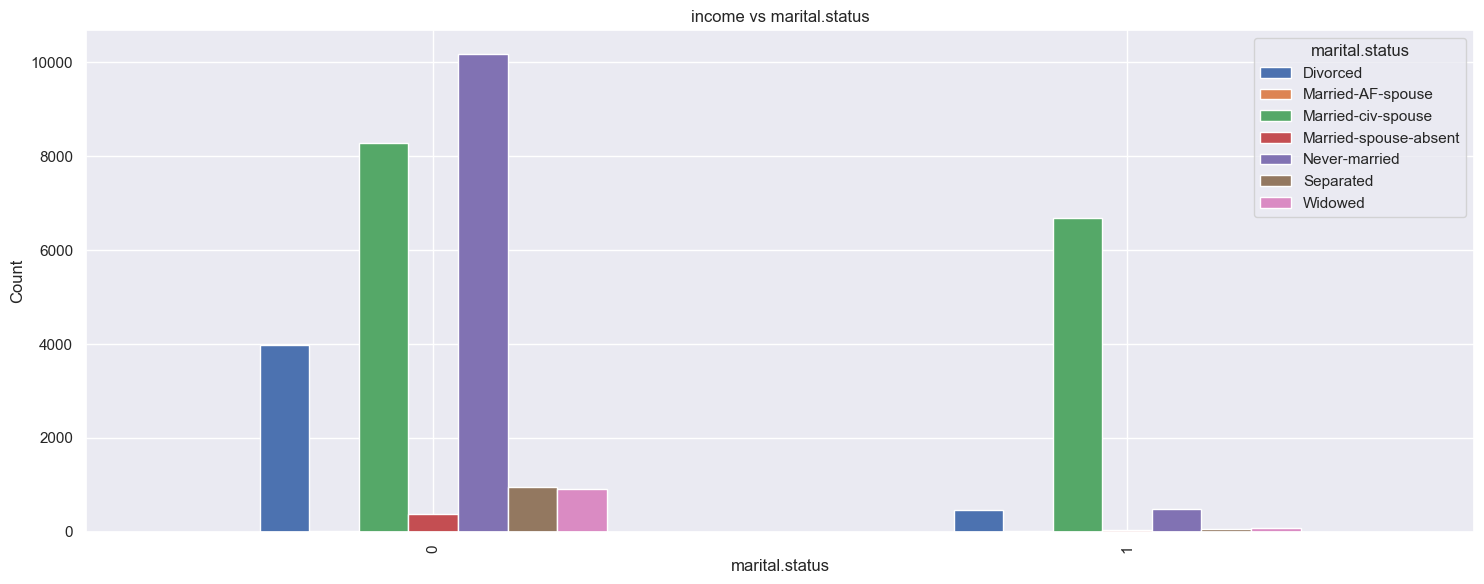

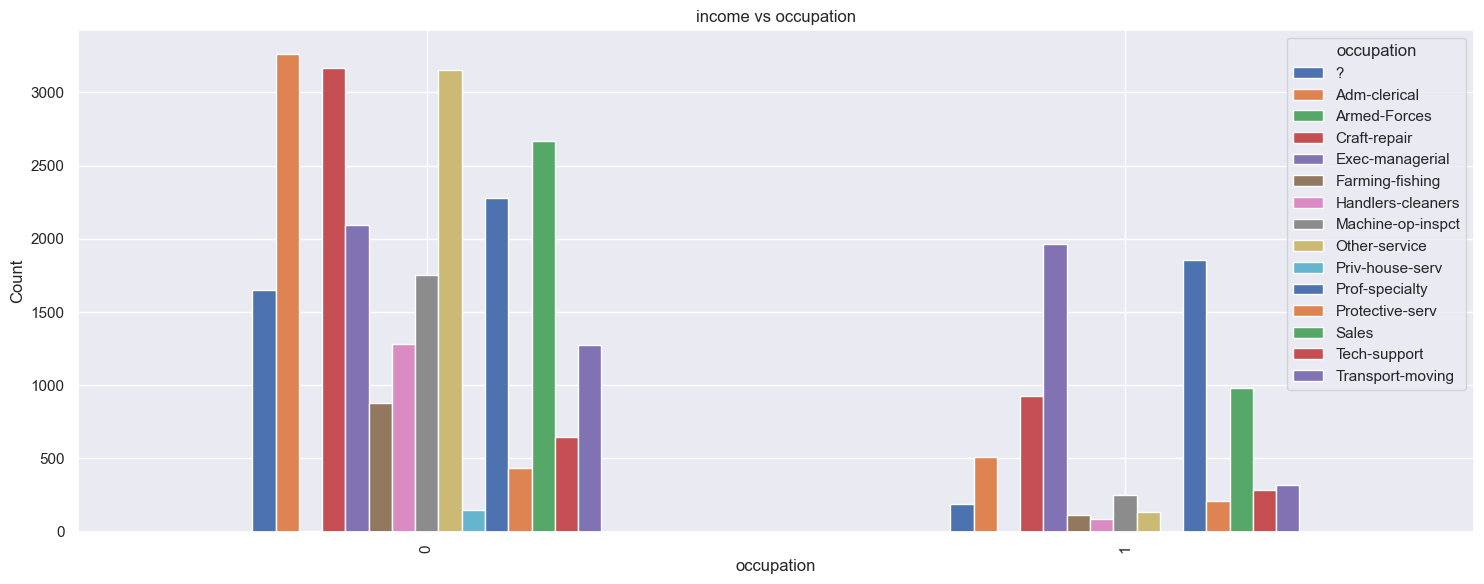

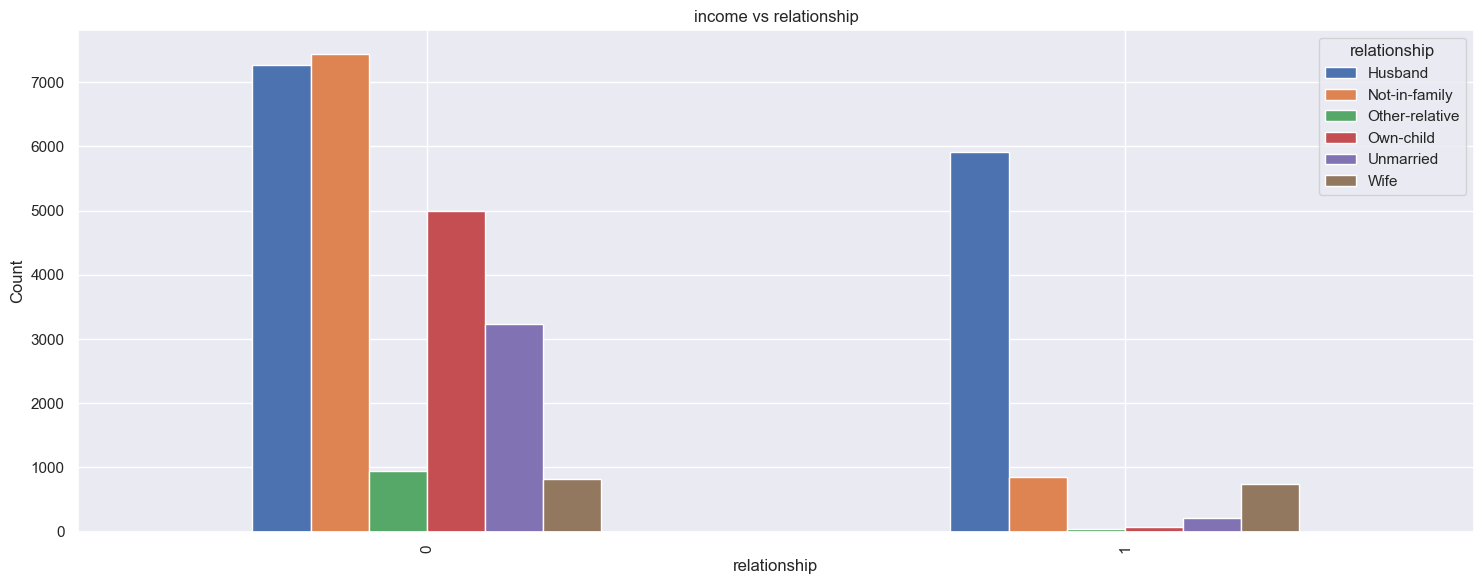

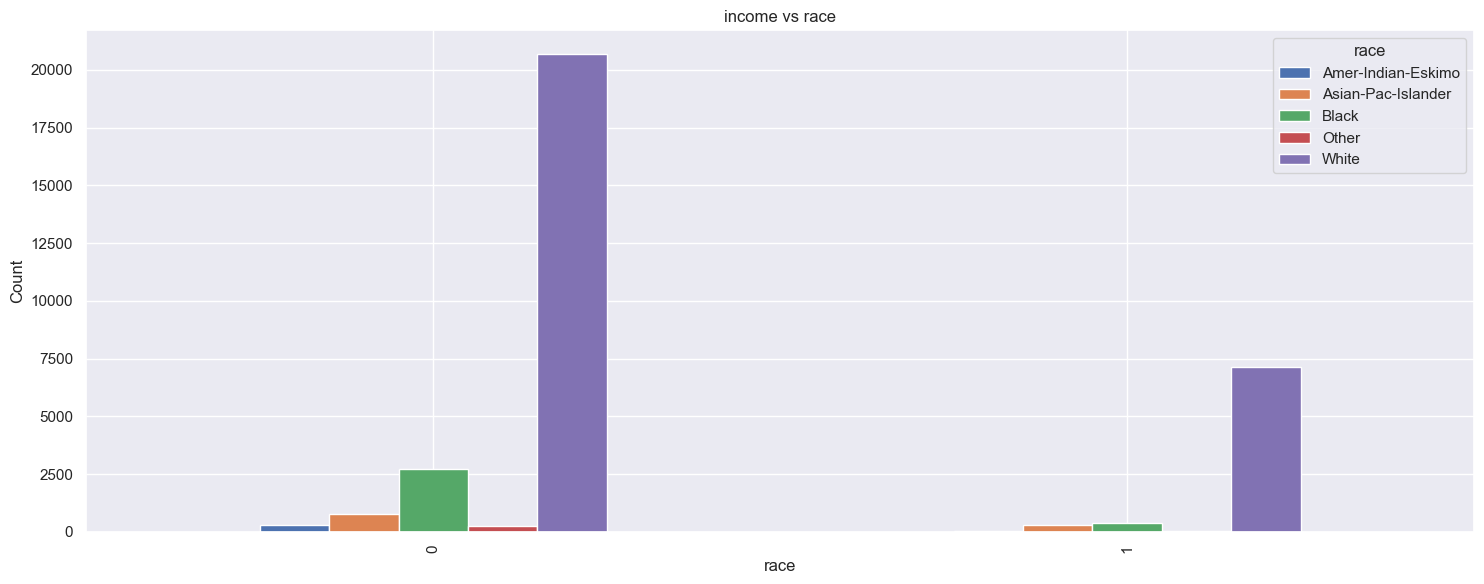

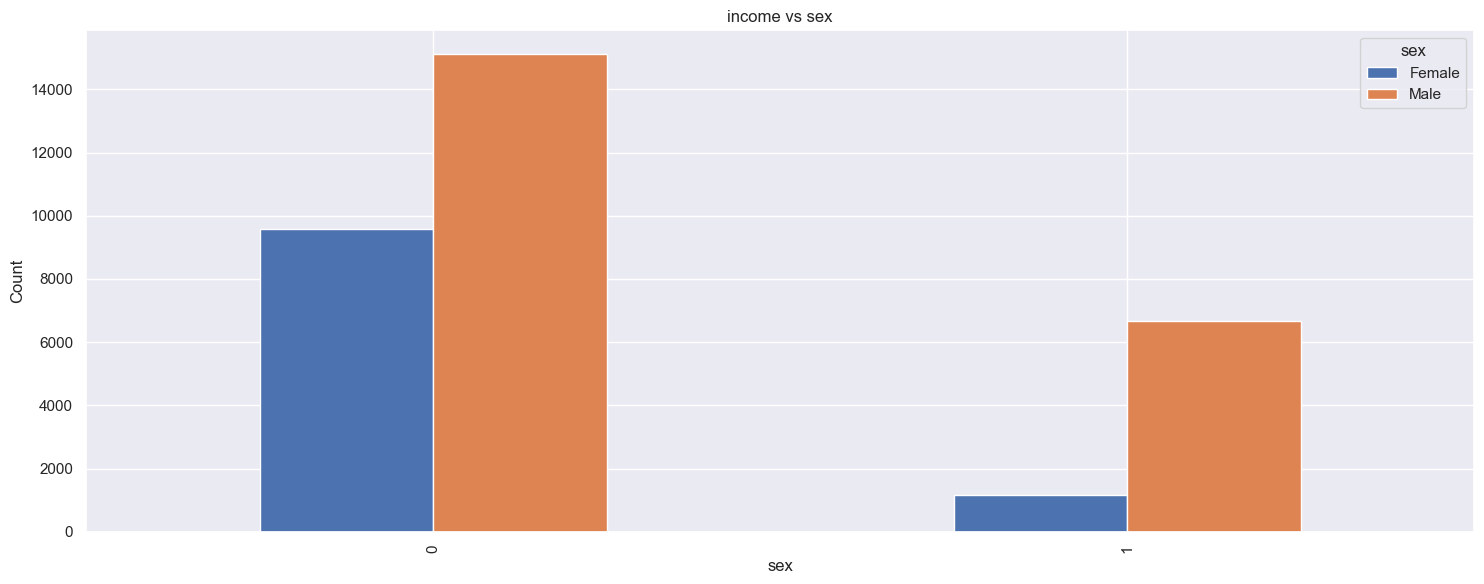

In [10]:
# Data Visualization
# Visualize the data using various plots to understand the distribution of features and relationships between them.

# Set plot style
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (15, 6)})

# Plot distribution of categorical features
categorical_columns1 = ['workclass', 'education', 'marital.status', 'occupation']
for i, col in enumerate(categorical_columns1):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=data[col])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

categorical_columns2 = ['relationship', 'race', 'sex', 'income']
for i, col in enumerate(categorical_columns2):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=data[col])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

# Plot distribution of numerical features
plt.suptitle("Distribution Graphs of Numerical Features")
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.distplot(data[col])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

# Plot boxplots of numerical features to see outliers
plt.suptitle("Boxplot of Numerical Features to See Outliers")
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=data[col])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

# Plot relationships between categorical features and income
income_vs_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in income_vs_features:
    crosstab = pd.crosstab(data['income'], data[feature])
    crosstab.plot(kind='bar')
    plt.title(f'income vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()

# Feature Engineering
Perform feature engineering, including encoding categorical variables and scaling numerical features.

In [11]:
# Feature Engineering
# Perform feature engineering, including encoding categorical variables and scaling numerical features.

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Define numerical and categorical pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Combine numerical and categorical pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Apply the transformations to the data
data_transformed = preprocessor.fit_transform(data)

# Convert the transformed data back to a DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=numerical_features.tolist() + categorical_features.tolist())

# Display the first few rows of the transformed dataset
data_transformed.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3.770003,-1.067955,-0.420679,-0.145975,10.589625,-0.035664,-2.656327,0.181519,2.249634,-1.554066,-0.277864,0.393685,-1.422436,0.291335,-0.563377
1,3.183397,-0.539159,-0.420679,-0.145975,10.589625,-1.817516,0.090129,0.181519,2.249634,-0.608318,-0.277864,0.393685,-1.422436,0.291335,-0.563377
2,2.010185,-0.035241,-0.031815,-0.145975,10.589625,-0.035664,-2.656327,1.215089,2.249634,-1.554066,1.588923,-1.962488,-1.422436,0.291335,-0.563377
3,1.130276,-0.468210,-2.364998,-0.145975,9.458380,-0.035664,0.090129,-1.368836,-1.733696,0.100993,1.588923,0.393685,-1.422436,0.291335,-0.563377
4,0.177041,0.709415,-0.031815,-0.145975,9.458380,-0.035664,0.090129,1.215089,1.585746,0.810304,0.966661,0.393685,-1.422436,0.291335,-0.563377


# Correlation Analysis
Analyze the correlation between features and the target variable using a heatmap.

In [12]:
# Correlation Analysis
# Analyze the correlation between features and the target variable using a heatmap.

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'United-States'

# Model Training
Train machine learning models using the processed data.

In [13]:
# Model Training
# Train machine learning models using the processed data.

# Separate dependent and independent features
X = data.drop("income", axis=1)
y = data["income"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shapes of the train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Import necessary libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Define a function to display performance metrics
def performance_metrics(test, predict):
    print(f"CONFUSION_MATRIX: \n{confusion_matrix(test, predict)}")
    print(f"PRECISION_SCORE: {precision_score(test, predict)}")
    print(f"RECALL_SCORE: {recall_score(test, predict)}")
    print(f"F1_SCORE: {f1_score(test, predict)}")
    print(f"ACCURACY_SCORE: {accuracy_score(test, predict)}")

# Logistic Regression
lr = LogisticRegression()
param_grid_lr = {
    "class_weight": ["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=3)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
y_pred_lr = grid_lr.predict(X_test)
performance_metrics(y_test, y_pred_lr)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
param_grid_dt = {
    "class_weight": ["balanced"],
    "criterion": ['gini', "entropy"],
    "splitter": ['best', 'random'],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["auto", "sqrt", "log2"]
}
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
y_pred_dt = grid_dt.predict(X_test)
performance_metrics(y_test, y_pred_dt)

# Random Forest Classifier
rf = RandomForestClassifier()
param_grid_rf = {
    "class_weight": ["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
performance_metrics(y_test, y_pred_rf)

# Display classification report for the best model
print("Classification Report for the Best Model (Random Forest):")
print(classification_report(y_test, y_pred_rf))

(26029, 15)
(6508, 15)
(26029,)
(6508,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear

ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1191, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2919, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1314, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1022, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 878, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nafiz/Desktop/MLOps Course/Data and Pipeline Versioning/mlops-project-structure/venv/lib/python3.12/site-packages/pandas/core/generic.py", line 2171, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'United-States'


# Model Evaluation
Evaluate the performance of the trained models using various metrics.

In [ ]:
# Model Evaluation
# Evaluate the performance of the trained models using various metrics.

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
performance_metrics(y_test, y_pred_lr)

# Evaluate Decision Tree model
print("Decision Tree Model Evaluation:")
performance_metrics(y_test, y_pred_dt)

# Evaluate Random Forest model
print("Random Forest Model Evaluation:")
performance_metrics(y_test, y_pred_rf)

# Display classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Display classification report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Display classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix for the best model (Random Forest)
ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test)
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Hyperparameter Tuning
Perform hyperparameter tuning to optimize the model performance.

In [ ]:
# Hyperparameter Tuning
# Perform hyperparameter tuning to optimize the model performance.

# Logistic Regression
lr = LogisticRegression()
param_grid_lr = {
    "class_weight": ["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=3)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
y_pred_lr = grid_lr.predict(X_test)
performance_metrics(y_test, y_pred_lr)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
param_grid_dt = {
    "class_weight": ["balanced"],
    "criterion": ['gini', "entropy"],
    "splitter": ['best', 'random'],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["auto", "sqrt", "log2"]
}
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
y_pred_dt = grid_dt.predict(X_test)
performance_metrics(y_test, y_pred_dt)

# Random Forest Classifier
rf = RandomForestClassifier()
param_grid_rf = {
    "class_weight": ["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
performance_metrics(y_test, y_pred_rf)

# Display classification report for the best model
print("Classification Report for the Best Model (Random Forest):")
print(classification_report(y_test, y_pred_rf))